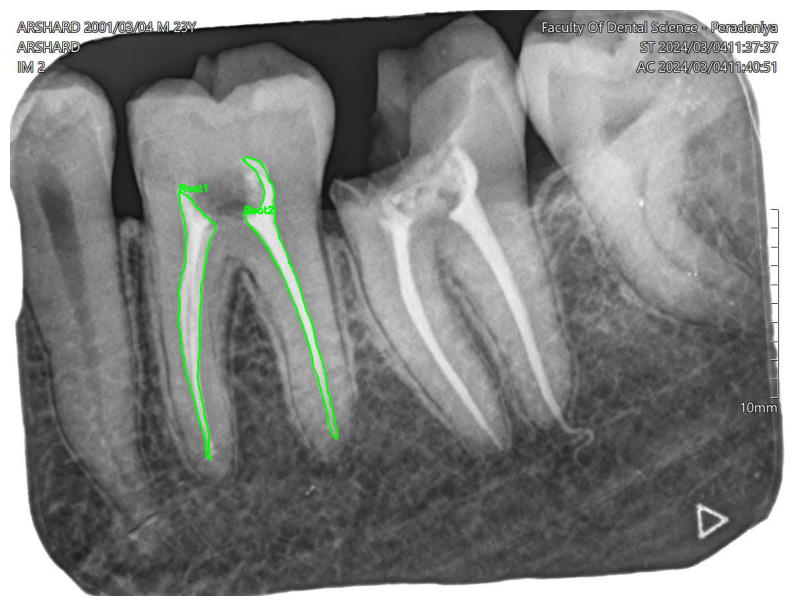

In [3]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

# Load the JSON file
with open('project-1-at-2025-03-04-07-31-9cf265ba.json', 'r') as file:
    data = json.load(file)

# Load the image
image_path = "2513-arshard.jpg"  # Normalize the path
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image from BGR to RGB for Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to draw a polygon on the image
def draw_polygon(image, points, color, label):
    points = np.array(points, dtype=np.int32)
    cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
    cv2.putText(image, label, tuple(points[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Extract original image dimensions
original_width = data[0]['annotations'][0]['result'][0]['original_width']
original_height = data[0]['annotations'][0]['result'][0]['original_height']

# Draw each polygon
for annotation in data[0]['annotations'][0]['result']:
    points = annotation['value']['points']
    label = annotation['value']['polygonlabels'][0]
    
    # Scale the points to pixel coordinates
    scaled_points = [
        [
            int(point[0] / 100 * original_width),
            int(point[1] / 100 * original_height)
        ]
        for point in points
    ]
    
    draw_polygon(image, scaled_points, (0, 255, 0), label)  # Green color for polygons

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

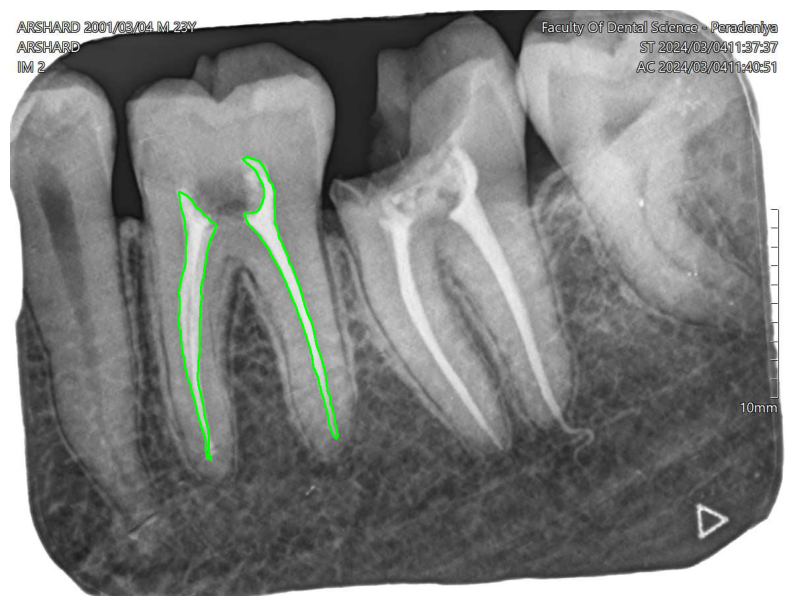

In [4]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

# Load the JSON file
with open('project-1-at-2025-03-04-07-31-9cf265ba.json', 'r') as file:
    data = json.load(file)

# Load the image
image_path = "2513-arshard.jpg"  # Normalize the path
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image from BGR to RGB for Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to draw a polygon on the image
def draw_polygon(image, points, color, label):
    points = np.array(points, dtype=np.int32)
    cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
    cv2.putText(image, label, tuple(points[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Function to perform morphological operations
def morphological_operations(mask, kernel_size, dilation_iterations, erosion_iterations):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_mask = cv2.dilate(mask, kernel, iterations=dilation_iterations)
    eroded_mask = cv2.erode(dilated_mask, kernel, iterations=erosion_iterations)
    return eroded_mask

# Extract original image dimensions
original_width = data[0]['annotations'][0]['result'][0]['original_width']
original_height = data[0]['annotations'][0]['result'][0]['original_height']

# Create a blank mask
mask = np.zeros((original_height, original_width), dtype=np.uint8)

# Draw each polygon on the mask
for annotation in data[0]['annotations'][0]['result']:
    points = annotation['value']['points']
    label = annotation['value']['polygonlabels'][0]
    
    # Scale the points to pixel coordinates
    scaled_points = [
        [
            int(point[0] / 100 * original_width),
            int(point[1] / 100 * original_height)
        ]
        for point in points
    ]
    
    # Draw the polygon on the mask
    cv2.fillPoly(mask, [np.array(scaled_points, dtype=np.int32)], 255)

# Perform morphological operations
kernel_size = 5
dilation_iterations = 2
erosion_iterations = 2
smoothed_mask = morphological_operations(mask, kernel_size, dilation_iterations, erosion_iterations)

# Find contours in the smoothed mask
contours, _ = cv2.findContours(smoothed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the smoothed contours on the image
for contour in contours:
    cv2.polylines(image, [contour], isClosed=True, color=(0, 255, 0), thickness=2)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

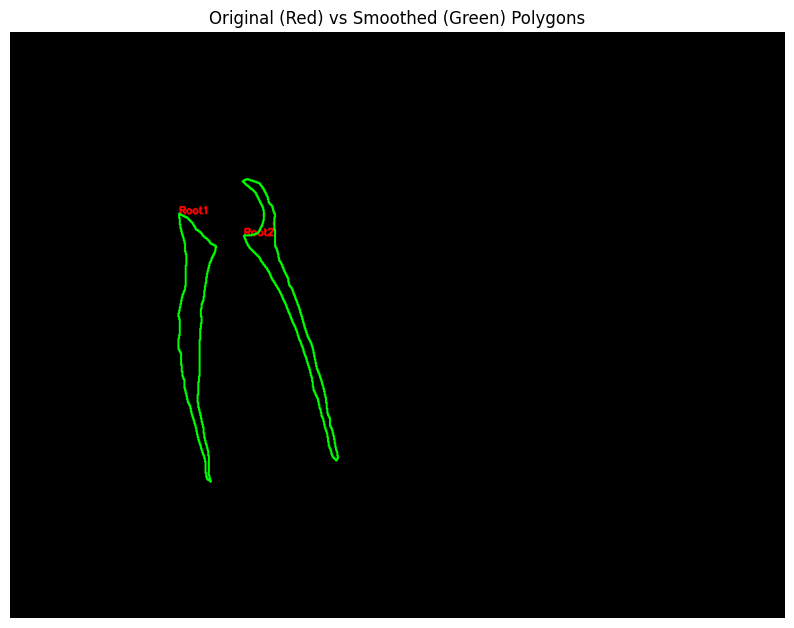

In [5]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

# Load the JSON file
with open('project-1-at-2025-03-04-07-31-9cf265ba.json', 'r') as file:
    data = json.load(file)

# Load the image
image_path = "2513-arshard.jpg"  # Normalize the path
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert the image from BGR to RGB for Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to draw a polygon on the image
def draw_polygon(image, points, color, label):
    points = np.array(points, dtype=np.int32)
    cv2.polylines(image, [points], isClosed=True, color=color, thickness=2)
    cv2.putText(image, label, tuple(points[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Function to perform morphological operations
def morphological_operations(mask, kernel_size, dilation_iterations, erosion_iterations):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_mask = cv2.dilate(mask, kernel, iterations=dilation_iterations)
    eroded_mask = cv2.erode(dilated_mask, kernel, iterations=erosion_iterations)
    return eroded_mask

# Extract original image dimensions
original_width = data[0]['annotations'][0]['result'][0]['original_width']
original_height = data[0]['annotations'][0]['result'][0]['original_height']

# Create a blank mask
mask = np.zeros((original_height, original_width), dtype=np.uint8)

# Draw each polygon on the mask
for annotation in data[0]['annotations'][0]['result']:
    points = annotation['value']['points']
    label = annotation['value']['polygonlabels'][0]
    
    # Scale the points to pixel coordinates
    scaled_points = [
        [
            int(point[0] / 100 * original_width),
            int(point[1] / 100 * original_height)
        ]
        for point in points
    ]
    
    # Draw the polygon on the mask
    cv2.fillPoly(mask, [np.array(scaled_points, dtype=np.int32)], 255)

# Perform morphological operations
kernel_size = 5
dilation_iterations = 2
erosion_iterations = 2
smoothed_mask = morphological_operations(mask, kernel_size, dilation_iterations, erosion_iterations)

# Find contours in the smoothed mask
contours, _ = cv2.findContours(smoothed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask image to visualize the changes
mask_image = np.zeros_like(image)

# Draw the original polygons on the mask image in red
for annotation in data[0]['annotations'][0]['result']:
    points = annotation['value']['points']
    label = annotation['value']['polygonlabels'][0]
    
    # Scale the points to pixel coordinates
    scaled_points = [
        [
            int(point[0] / 100 * original_width),
            int(point[1] / 100 * original_height)
        ]
        for point in points
    ]
    
    draw_polygon(mask_image, scaled_points, (255, 0, 0), label)  # Red color for original polygons

# Draw the smoothed contours on the mask image in green
for contour in contours:
    cv2.polylines(mask_image, [contour], isClosed=True, color=(0, 255, 0), thickness=2)  # Green color for smoothed contours

# Display the mask image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(mask_image)
plt.title('Original (Red) vs Smoothed (Green) Polygons')
plt.axis('off')
plt.show()

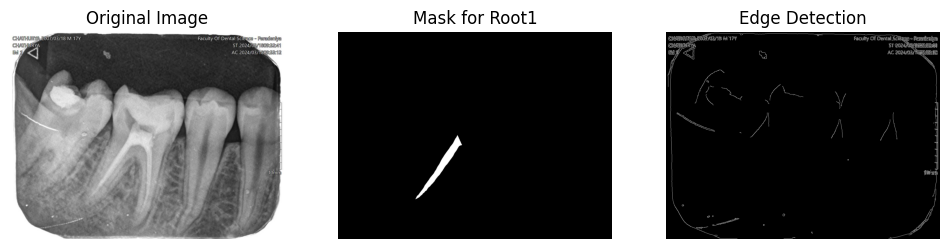

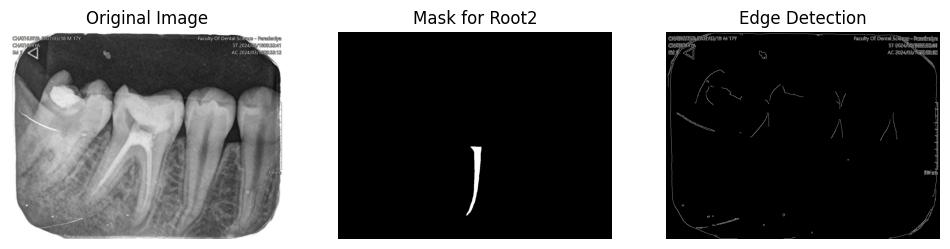

Results for Root1:
  Avg inner border intensity: 185.45
  Avg outer border intensity: 172.42
  Avg edge inner intensity: 0.00
  Avg edge outer intensity: 0.00
--------------------------------------------------
Results for Root2:
  Avg inner border intensity: 176.97
  Avg outer border intensity: 167.45
  Avg edge inner intensity: 0.00
  Avg edge outer intensity: 0.00
--------------------------------------------------


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the JSON file
with open('project-1-at-2025-03-04-07-31-9cf265ba.json', 'r') as file:
    data = json.load(file)

# Load the image
image_path = data[0]['data']['image'].replace('\\', '/')
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert to grayscale for analysis
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract original image dimensions
original_width = data[0]['annotations'][0]['result'][0]['original_width']
original_height = data[0]['annotations'][0]['result'][0]['original_height']

# Create a blank mask
mask = np.zeros((original_height, original_width), dtype=np.uint8)

# Draw each polygon on the mask
for annotation in data[0]['annotations'][0]['result']:
    points = annotation['value']['points']
    
    # Scale the points to pixel coordinates
    scaled_points = np.array([
        [
            int(point[0] / 100 * original_width),
            int(point[1] / 100 * original_height)
        ]
        for point in points
    ], dtype=np.int32)
    
    cv2.fillPoly(mask, [scaled_points], 255)

# Perform edge detection on original image
edges_original = cv2.Canny(gray_image, 50, 150)

# Perform edge detection on mask
edges_mask = cv2.Canny(mask, 50, 150)

# Find contours in mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing
image_with_analysis = image.copy()

# Analyze edges and pixel intensities
for contour in contours:
    # Get points along the contour
    contour_points = contour.squeeze()
    
    # Analyze pixel intensities around the contour
    for point in contour_points:
        x, y = point
        # Get a small neighborhood around the point
        neighborhood = gray_image[max(0, y-5):min(gray_image.shape[0], y+5),
                                  max(0, x-5):min(gray_image.shape[1], x+5)]
        
        # Calculate intensity statistics
        mean_intensity = np.mean(neighborhood)
        std_intensity = np.std(neighborhood)
        
        # Check for potential voids (sudden intensity changes)
        if mean_intensity < 100:  # Threshold can be adjusted
            # Mark potential void locations
            cv2.circle(image_with_analysis, (x, y), 3, (0, 0, 255), -1)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Annotation Mask')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_original, cmap='gray')
plt.title('Edges in Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_with_analysis)
plt.title('Analysis Results (Red: Potential Voids)')
plt.axis('off')

plt.tight_layout()
plt.show()

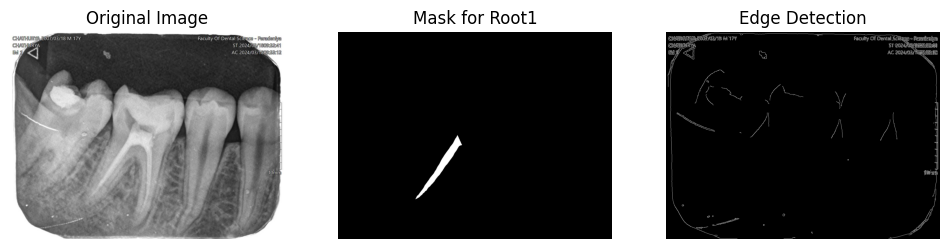

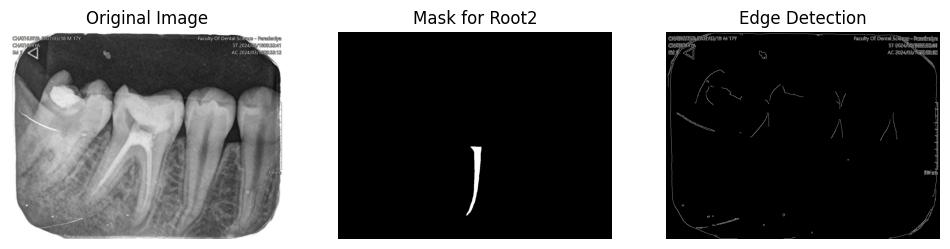

Results for Root1:
  Avg inner border intensity: 185.45
  Avg outer border intensity: 172.42
  Avg edge inner intensity: 0.00
  Avg edge outer intensity: 0.00
--------------------------------------------------
Results for Root2:
  Avg inner border intensity: 176.97
  Avg outer border intensity: 167.45
  Avg edge inner intensity: 0.00
  Avg edge outer intensity: 0.00
--------------------------------------------------


In [9]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    Assumes the normalized points are given in percentages.
    """
    scaled = []
    for pt in points:
        # Convert from percentage to pixel coordinate
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    The mask will have the same height and width as the input image.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def analyze_edges(image, mask, dilate_iter=3, erode_iter=3):
    """
    Analyze the edge characteristics by:
      - Creating an inner border (by eroding the mask)
      - Creating an outer border (by dilating the mask)
      - Calculating average grayscale intensities in each border region
      - Running Canny edge detection for additional edge visualization.
    """
    # Convert image to grayscale for intensity analysis
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create a kernel for morphological operations
    kernel = np.ones((3,3), np.uint8)
    # Erode and dilate the mask to get inner and outer borders
    mask_eroded = cv2.erode(mask, kernel, iterations=erode_iter)
    mask_dilated = cv2.dilate(mask, kernel, iterations=dilate_iter)
    
    # Define inner border as the difference between mask and eroded mask
    inner_border = cv2.subtract(mask, mask_eroded)
    # Define outer border as the difference between dilated mask and mask
    outer_border = cv2.subtract(mask_dilated, mask)
    
    # Get pixel values in the border regions
    inner_values = gray[inner_border == 255]
    outer_values = gray[outer_border == 255]
    avg_inner = np.mean(inner_values) if inner_values.size > 0 else 0
    avg_outer = np.mean(outer_values) if outer_values.size > 0 else 0
    
    # Apply Canny edge detection to the grayscale image
    edges = cv2.Canny(gray, 100, 200)
    
    # Optionally, extract edge pixel intensities along the border regions
    edge_inner = edges[inner_border == 255]
    edge_outer = edges[outer_border == 255]
    avg_edge_inner = np.mean(edge_inner) if edge_inner.size > 0 else 0
    avg_edge_outer = np.mean(edge_outer) if edge_outer.size > 0 else 0
    
    return {
       'avg_inner_intensity': avg_inner,
       'avg_outer_intensity': avg_outer,
       'avg_edge_inner': avg_edge_inner,
       'avg_edge_outer': avg_edge_outer,
       'edges': edges,
       'inner_border': inner_border,
       'outer_border': outer_border
    }

def main():
    # File names (ensure the JSON file and image file paths are correct)
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    annotations = load_annotations(json_file)
    
    # Assuming the JSON file contains one annotation entry
    annotation_entry = annotations[0]
    # Extract the image file path from the JSON "data" section
    image_path = "3245-chathurya.jpg"  # e.g., "/data/upload/1/e08721c8-3245-chathurya.jpg"
    
    # Load the radiograph image
    image = load_image(image_path)
    if image is None:
        return

    results = []
    
    # Loop through each annotation (each root filling polygon)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]  # e.g., "Root1" or "Root2"
            
            # Retrieve original image dimensions from the JSON for scaling
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create a mask for the polygon area using the scaled points
            mask = create_mask_for_polygon(image.shape, scaled_points)
            # Analyze the edges and intensity gradients
            analysis = analyze_edges(image, mask)
            
            results.append({
                'label': label,
                'analysis': analysis,
                'mask': mask
            })
            
            # Display the original image, the polygon mask, and the edge detection result
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis("off")
            
            plt.subplot(1, 3, 2)
            plt.imshow(mask, cmap='gray')
            plt.title(f"Mask for {label}")
            plt.axis("off")
            
            plt.subplot(1, 3, 3)
            plt.imshow(analysis['edges'], cmap='gray')
            plt.title("Edge Detection")
            plt.axis("off")
            
            plt.show()
    
    # Print analysis results for each root filling
    for res in results:
        label = res['label']
        analysis = res['analysis']
        print(f"Results for {label}:")
        print(f"  Avg inner border intensity: {analysis['avg_inner_intensity']:.2f}")
        print(f"  Avg outer border intensity: {analysis['avg_outer_intensity']:.2f}")
        print(f"  Avg edge inner intensity: {analysis['avg_edge_inner']:.2f}")
        print(f"  Avg edge outer intensity: {analysis['avg_edge_outer']:.2f}")
        print("-" * 50)

if __name__ == "__main__":
    main()


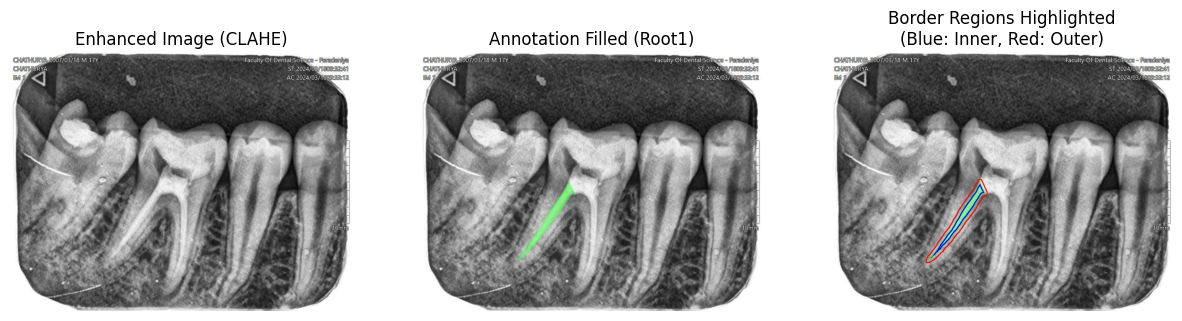

Results for Root1:
  Average intensity in filling region: 211.39
  Average intensity in inner border (edge inside): 216.42
  Average intensity in outer border (edge outside): 167.86
--------------------------------------------------


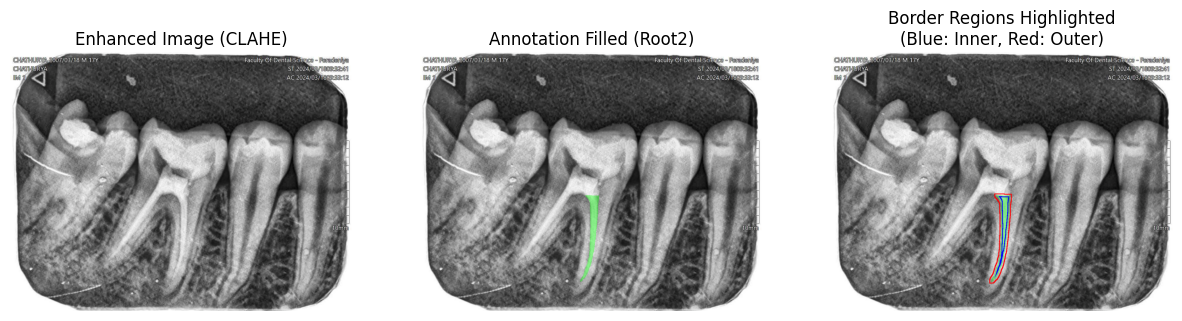

Results for Root2:
  Average intensity in filling region: 208.04
  Average intensity in inner border (edge inside): 216.43
  Average intensity in outer border (edge outside): 178.64
--------------------------------------------------


In [75]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance the image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    Assumes the normalized points are given in percentages.
    Adjust the conversion if your points are normalized differently.
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    The mask will have the same height and width as the input image.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def create_border_regions(mask, range_pixels):
    """
    Given a binary mask, create inner and outer border regions using
    morphological erosion and dilation.
    
    - inner_border: region lost when eroding the mask by 'range_pixels'
    - outer_border: additional region gained when dilating the mask by 'range_pixels'
    
    Note: 'range_pixels' is an approximation for 2mm in pixels. Adjust as needed.
    """
    kernel = np.ones((3,3), np.uint8)
    eroded = cv2.erode(mask, kernel, iterations=range_pixels)
    dilated = cv2.dilate(mask, kernel, iterations=range_pixels)
    
    inner_border_1 = cv2.subtract(mask, eroded)
    eroded = cv2.erode(mask, kernel, iterations=range_pixels+3)
    inner_border_2 = cv2.subtract(mask, eroded)
    inner_border = cv2.subtract(inner_border_2, inner_border_1)

    outer_border_1 = cv2.subtract(dilated, mask)
    dilated = cv2.dilate(mask, kernel, iterations=range_pixels+3)
    outer_border_2 = cv2.subtract(dilated, mask)
    outer_border = cv2.subtract(outer_border_2, outer_border_1)
    return inner_border, outer_border

def analyze_intensities(image, mask, inner_border, outer_border):
    """
    Analyze average grayscale intensities in:
      - The filling region (mask)
      - The inner border (edge within the filling)
      - The outer border (just outside the filling)
      
    The analysis is done on a grayscale version of the image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    filling_values = gray[mask == 255]
    inner_values = gray[inner_border == 255]
    outer_values = gray[outer_border == 255]
    
    avg_filling = np.mean(filling_values) if filling_values.size > 0 else 0
    avg_inner = np.mean(inner_values) if inner_values.size > 0 else 0
    avg_outer = np.mean(outer_values) if outer_values.size > 0 else 0
    
    return avg_filling, avg_inner, avg_outer

def overlay_annotation(image, points, color=(0, 255, 0), alpha=0.4):
    """
    Overlay a filled polygon with transparency on the image.
    """
    overlay = image.copy()
    pts = np.array(points, dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def main():
    # Define file names and parameters
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    range_pixels = 3  # Approximate pixel distance for a 2mm range (adjust as needed)
    
    # Load annotation JSON and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"  # e.g., "/data/upload/1/e08721c8-3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Enhance the image using CLAHE
    enhanced_image = apply_clahe_color(image)
    
    results = []
    
    # Process each annotation (each root filling polygon)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]  # e.g., "Root1" or "Root2"
            
            # Get original dimensions for scaling (fallback to image dimensions if missing)
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create the filled region mask from the scaled points
            mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Create border regions (inner and outer) from the mask
            inner_border, outer_border = create_border_regions(mask, range_pixels)
            
            # Analyze the average intensities in the filling region and border regions
            avg_filling, avg_inner, avg_outer = analyze_intensities(enhanced_image, mask, inner_border, outer_border)
            
            results.append({
                'label': label,
                'avg_filling': avg_filling,
                'avg_inner': avg_inner,
                'avg_outer': avg_outer,
                'mask': mask,
                'inner_border': inner_border,
                'outer_border': outer_border,
                'scaled_points': scaled_points
            })
            
            # Overlay the filled annotation region (with transparency) on the enhanced image
            annotated_img = overlay_annotation(enhanced_image, scaled_points, color=(0, 255, 0), alpha=0.4)
            
            # For visualization, we will also highlight the inner and outer border regions in different colors
            border_overlay = annotated_img.copy()
            # Color inner border in blue
            border_overlay[inner_border == 255] = [255, 0, 0]
            # Color outer border in red
            border_overlay[outer_border == 255] = [0, 0, 255]
            
            # Display the images
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
            plt.title("Enhanced Image (CLAHE)")
            plt.axis("off")
            
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Annotation Filled ({label})")
            plt.axis("off")
            
            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(border_overlay, cv2.COLOR_BGR2RGB))
            plt.title("Border Regions Highlighted\n(Blue: Inner, Red: Outer)")
            plt.axis("off")
            plt.show()
            
            print(f"Results for {label}:")
            print(f"  Average intensity in filling region: {avg_filling:.2f}")
            print(f"  Average intensity in inner border (edge inside): {avg_inner:.2f}")
            print(f"  Average intensity in outer border (edge outside): {avg_outer:.2f}")
            print("-" * 50)

if __name__ == "__main__":
    main()


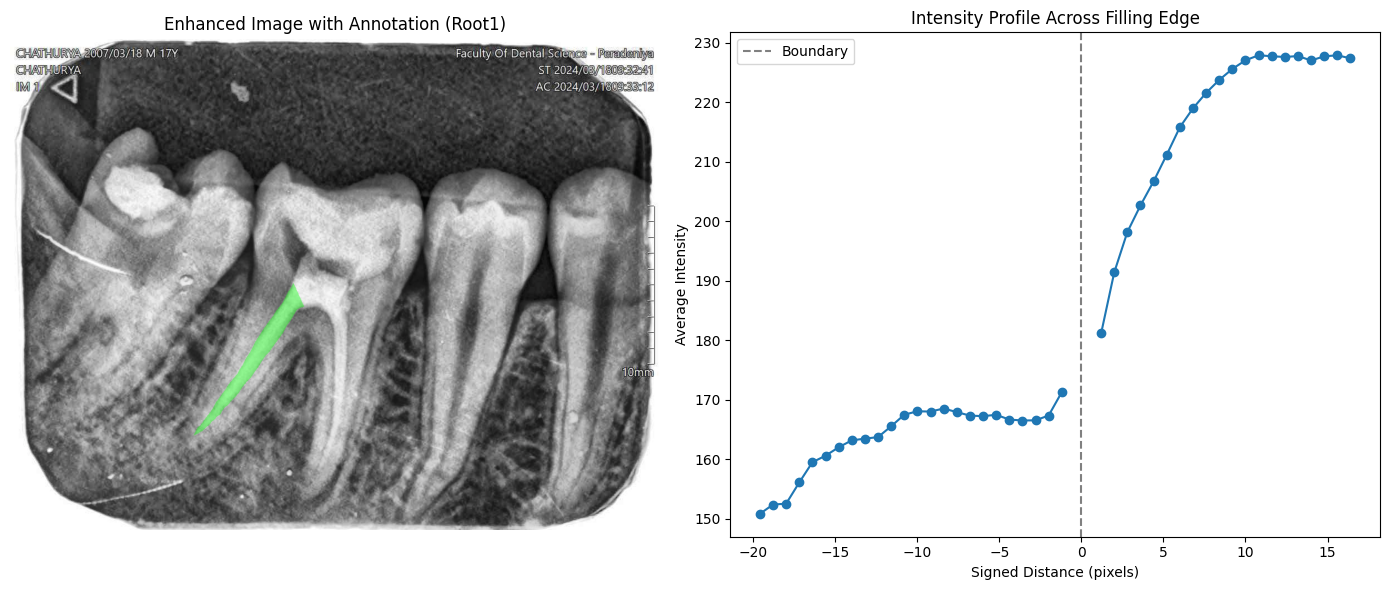

Intensity profile for Root1 (sampled from -20 to 20 pixels):
Distance -19.60 px: Intensity 150.83
Distance -18.80 px: Intensity 152.38
Distance -18.00 px: Intensity 152.53
Distance -17.20 px: Intensity 156.10
Distance -16.40 px: Intensity 159.49
Distance -15.60 px: Intensity 160.59
Distance -14.80 px: Intensity 162.00
Distance -14.00 px: Intensity 163.17
Distance -13.20 px: Intensity 163.45
Distance -12.40 px: Intensity 163.71
Distance -11.60 px: Intensity 165.53
Distance -10.80 px: Intensity 167.47
Distance -10.00 px: Intensity 168.05
Distance  -9.20 px: Intensity 168.00
Distance  -8.40 px: Intensity 168.52
Distance  -7.60 px: Intensity 167.91
Distance  -6.80 px: Intensity 167.33
Distance  -6.00 px: Intensity 167.23
Distance  -5.20 px: Intensity 167.46
Distance  -4.40 px: Intensity 166.66
Distance  -3.60 px: Intensity 166.50
Distance  -2.80 px: Intensity 166.53
Distance  -2.00 px: Intensity 167.34
Distance  -1.20 px: Intensity 171.26
Distance  -0.40 px: Intensity    nan
Distance   0.4

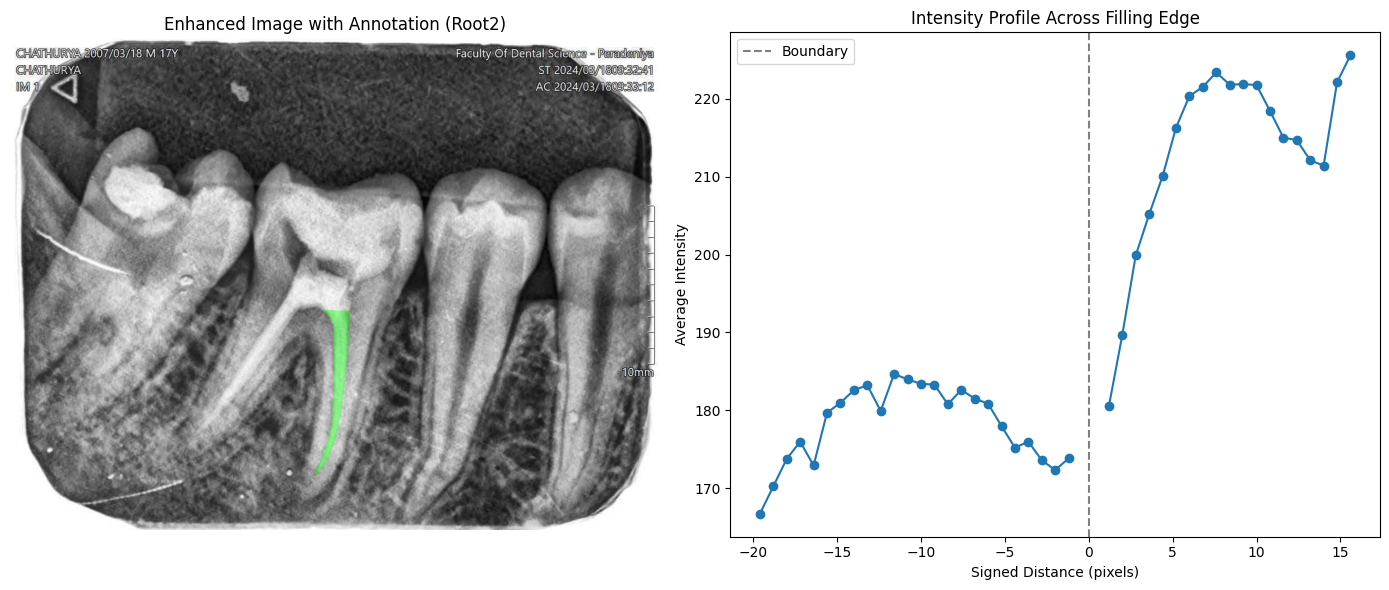

Intensity profile for Root2 (sampled from -20 to 20 pixels):
Distance -19.60 px: Intensity 166.74
Distance -18.80 px: Intensity 170.27
Distance -18.00 px: Intensity 173.79
Distance -17.20 px: Intensity 175.99
Distance -16.40 px: Intensity 172.94
Distance -15.60 px: Intensity 179.70
Distance -14.80 px: Intensity 180.98
Distance -14.00 px: Intensity 182.60
Distance -13.20 px: Intensity 183.23
Distance -12.40 px: Intensity 179.93
Distance -11.60 px: Intensity 184.69
Distance -10.80 px: Intensity 183.98
Distance -10.00 px: Intensity 183.41
Distance  -9.20 px: Intensity 183.31
Distance  -8.40 px: Intensity 180.79
Distance  -7.60 px: Intensity 182.64
Distance  -6.80 px: Intensity 181.52
Distance  -6.00 px: Intensity 180.86
Distance  -5.20 px: Intensity 177.98
Distance  -4.40 px: Intensity 175.22
Distance  -3.60 px: Intensity 175.99
Distance  -2.80 px: Intensity 173.61
Distance  -2.00 px: Intensity 172.35
Distance  -1.20 px: Intensity 173.84
Distance  -0.40 px: Intensity    nan
Distance   0.4

In [11]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    (Assumes normalized points are in percentage; adjust if needed.)
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def overlay_annotation(image, points, color=(0, 255, 0), alpha=0.4):
    """
    Overlay a filled polygon with a semi-transparent color on the image.
    """
    overlay = image.copy()
    pts = np.array(points, dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def compute_signed_distance(mask):
    """
    Compute a signed distance map from the polygon mask.
    Pixels inside the mask get positive distances,
    and pixels outside get negative distances.
    """
    # Convert mask to binary (0 and 1)
    mask_bool = (mask > 0).astype(np.uint8)
    
    # Distance transform for inside and outside
    dist_inside = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
    dist_outside = cv2.distanceTransform(255 - mask, cv2.DIST_L2, 5)
    
    signed_distance = np.zeros_like(mask, dtype=np.float32)
    signed_distance[mask_bool == 1] = dist_inside[mask_bool == 1]
    signed_distance[mask_bool == 0] = -dist_outside[mask_bool == 0]
    return signed_distance

def sample_intensity_profile(gray, signed_distance, min_dist, max_dist, num_bins=50):
    """
    Compute the average intensity for pixels binned by their signed distance
    from the polygon boundary. This yields an intensity profile across the edge.
    """
    bins = np.linspace(min_dist, max_dist, num_bins+1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_intensity = np.zeros(num_bins)
    
    for i in range(num_bins):
        mask_bin = (signed_distance >= bins[i]) & (signed_distance < bins[i+1])
        if np.sum(mask_bin) > 0:
            bin_intensity[i] = np.mean(gray[mask_bin])
        else:
            bin_intensity[i] = np.nan
    return bin_centers, bin_intensity

def main():
    # File and parameter settings
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    # Define the distance (in pixels) to sample intensity on both sides of the edge.
    # Adjust this value so that it roughly covers a 2mm range (calibration needed).
    sample_range_pixels = 20  
    num_bins = 50  # Number of bins for intensity profile sampling

    # Load annotations and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Enhance image using CLAHE
    enhanced_image = apply_clahe_color(image)
    
    # Convert enhanced image to grayscale for intensity analysis
    gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)
    
    # Process each annotation (each root filling)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]
            
            # Get original dimensions for scaling
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create a mask for the filling region
            mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Overlay the filled annotation (with transparency) on the enhanced image
            annotated_img = overlay_annotation(enhanced_image, scaled_points, color=(0, 255, 0), alpha=0.4)
            
            # Compute the signed distance map from the polygon boundary
            signed_distance = compute_signed_distance(mask)
            
            # Define the range for sampling (from -sample_range_pixels to +sample_range_pixels)
            min_dist = -sample_range_pixels
            max_dist = sample_range_pixels
            
            # Sample the intensity profile across the edge
            bin_centers, bin_intensity = sample_intensity_profile(gray, signed_distance, min_dist, max_dist, num_bins)
            
            # Plot the annotated image and the intensity profile
            plt.figure(figsize=(14, 6))
            
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Enhanced Image with Annotation ({label})")
            plt.axis("off")
            
            plt.subplot(1, 2, 2)
            plt.plot(bin_centers, bin_intensity, marker='o')
            plt.xlabel("Signed Distance (pixels)")
            plt.ylabel("Average Intensity")
            plt.title("Intensity Profile Across Filling Edge")
            plt.axvline(0, color='gray', linestyle='--', label='Boundary')
            plt.legend()
            
            plt.tight_layout()
            plt.show()
            
            print(f"Intensity profile for {label} (sampled from {min_dist} to {max_dist} pixels):")
            for center, intensity in zip(bin_centers, bin_intensity):
                print(f"Distance {center:6.2f} px: Intensity {intensity:6.2f}")
            print("-" * 50)

if __name__ == "__main__":
    main()


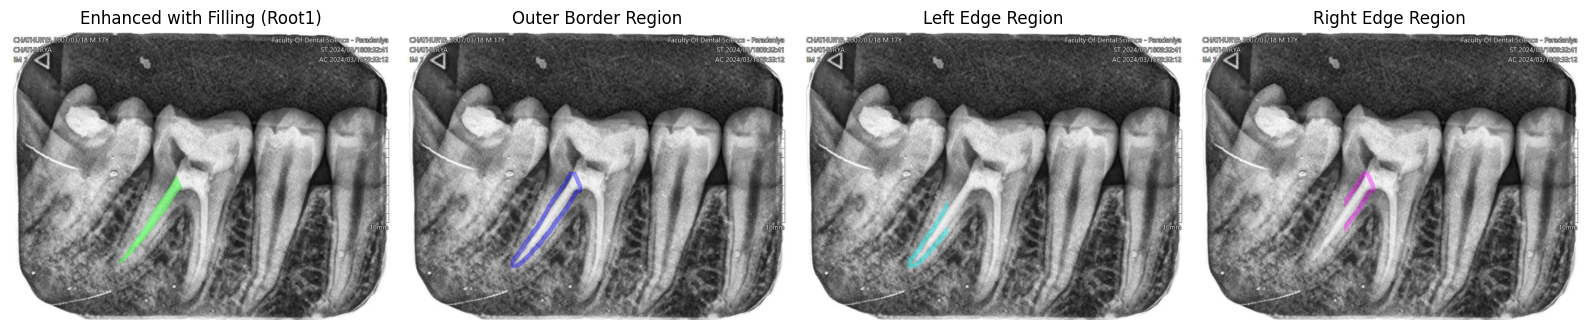

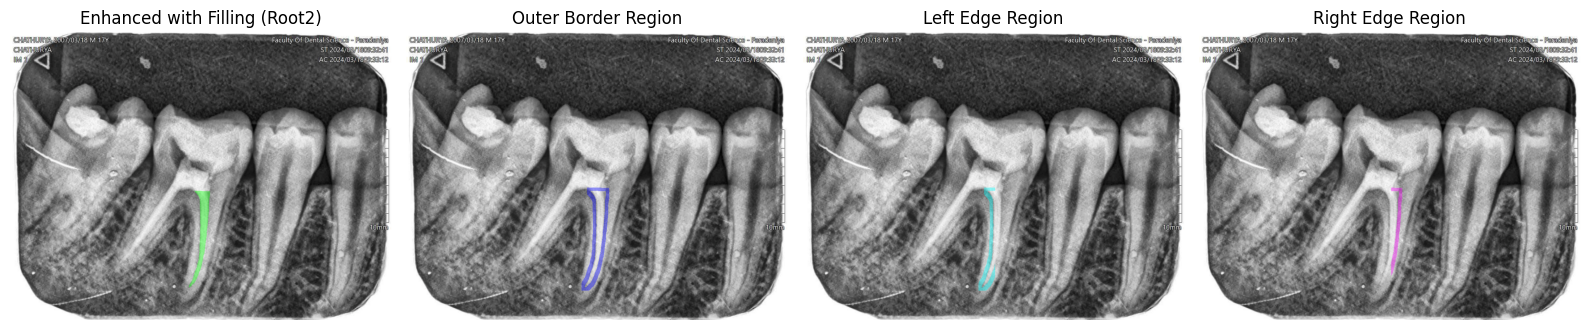

In [12]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    Assumes the points are in percentage (0-100); adjust if needed.
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask (same width and height as the image) for the polygon.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def overlay_mask(image, mask, color, alpha=0.4):
    """
    Overlay a transparent colored mask on the image.
    """
    overlay = image.copy()
    # Create a color overlay only where mask is set.
    overlay[mask == 255] = color
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def get_outer_border(mask, iterations=10):
    """
    Compute the outer border region by dilating the mask and subtracting the original.
    The 'iterations' parameter controls the width of the outer border (tune to approximate 2mm).
    """
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(mask, kernel, iterations=iterations)
    outer_border = cv2.subtract(dilated, mask)
    return outer_border

def compute_centroid(mask):
    """
    Compute the centroid of the polygon mask using image moments.
    """
    M = cv2.moments(mask)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        # Fallback to image center if moments cannot be computed.
        h, w = mask.shape
        cx, cy = w // 2, h // 2
    return cx, cy

def split_outer_border_by_side(outer_border, cx):
    """
    Split the outer border mask into left and right regions based on the x-coordinate of the centroid.
    """
    left_edge_mask = np.zeros_like(outer_border)
    right_edge_mask = np.zeros_like(outer_border)
    
    ys, xs = np.where(outer_border == 255)
    # For each pixel in the outer border, decide based on its x coordinate relative to cx.
    left_indices = xs < cx
    right_indices = xs >= cx
    
    left_edge_mask[ys[left_indices], xs[left_indices]] = 255
    right_edge_mask[ys[right_indices], xs[right_indices]] = 255
    return left_edge_mask, right_edge_mask

def main():
    # File and parameter settings
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    # Number of iterations for dilation (tune this so that the outer border approximates 2mm)
    dilation_iterations = 10

    # Load annotations and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Enhance image using CLAHE
    enhanced_image = apply_clahe_color(image)
    
    # Process each annotation (each root filling)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]
            
            # Get original dimensions for scaling
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create the filled region mask from the scaled polygon
            filling_mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Overlay the filling region (with transparent color) on the enhanced image
            annotated_img = overlay_mask(enhanced_image, filling_mask, color=(0, 255, 0), alpha=0.4)
            
            # Compute the outer border (the area just outside the filling)
            outer_border = get_outer_border(filling_mask, iterations=dilation_iterations)
            
            # Compute the centroid of the filling for later splitting
            cx, cy = compute_centroid(filling_mask)
            
            # Split the outer border into left and right regions based on the centroid
            left_edge, right_edge = split_outer_border_by_side(outer_border, cx)
            
            # Create overlay images for visualization:
            # 1. Outer border overlay (use a transparent blue)
            outer_overlay = overlay_mask(enhanced_image, outer_border, color=(255, 0, 0), alpha=0.4)
            # 2. Left edge overlay (transparent cyan)
            left_overlay = overlay_mask(enhanced_image, left_edge, color=(255, 255, 0), alpha=0.4)
            # 3. Right edge overlay (transparent magenta)
            right_overlay = overlay_mask(enhanced_image, right_edge, color=(255, 0, 255), alpha=0.4)
            
            # Plot the images
            plt.figure(figsize=(16, 5))
            
            # Show the enhanced image with filled annotation (for context)
            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Enhanced with Filling ({label})")
            plt.axis("off")
            
            # Show the outer border region
            plt.subplot(1, 4, 2)
            plt.imshow(cv2.cvtColor(outer_overlay, cv2.COLOR_BGR2RGB))
            plt.title("Outer Border Region")
            plt.axis("off")
            
            # Show the left edge region
            plt.subplot(1, 4, 3)
            plt.imshow(cv2.cvtColor(left_overlay, cv2.COLOR_BGR2RGB))
            plt.title("Left Edge Region")
            plt.axis("off")
            
            # Show the right edge region
            plt.subplot(1, 4, 4)
            plt.imshow(cv2.cvtColor(right_overlay, cv2.COLOR_BGR2RGB))
            plt.title("Right Edge Region")
            plt.axis("off")
            
            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    main()


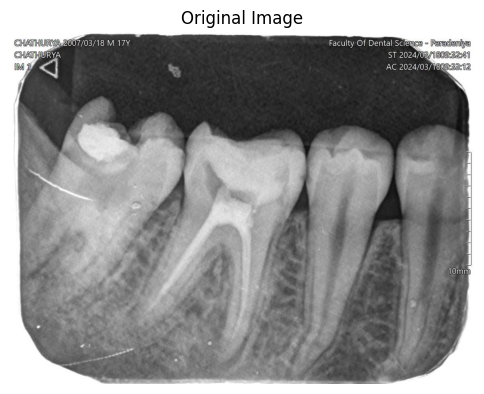

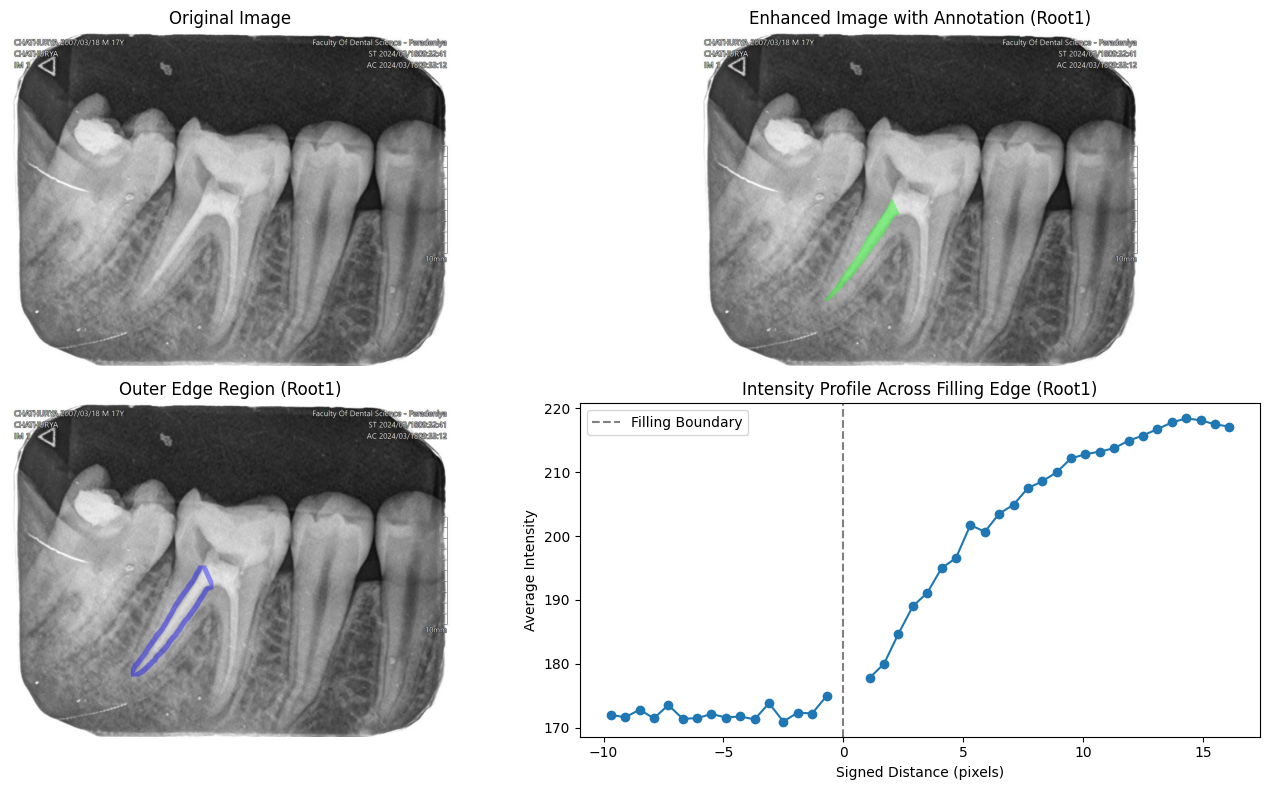

Intensity profile for Root1 (sampled from -10 to 20 pixels):
Distance  -9.70 px: Intensity 172.00
Distance  -9.10 px: Intensity 171.61
Distance  -8.50 px: Intensity 172.80
Distance  -7.90 px: Intensity 171.46
Distance  -7.30 px: Intensity 173.53
Distance  -6.70 px: Intensity 171.39
Distance  -6.10 px: Intensity 171.48
Distance  -5.50 px: Intensity 172.14
Distance  -4.90 px: Intensity 171.58
Distance  -4.30 px: Intensity 171.75
Distance  -3.70 px: Intensity 171.29
Distance  -3.10 px: Intensity 173.83
Distance  -2.50 px: Intensity 170.95
Distance  -1.90 px: Intensity 172.36
Distance  -1.30 px: Intensity 172.21
Distance  -0.70 px: Intensity 174.94
Distance  -0.10 px: Intensity    nan
Distance   0.50 px: Intensity    nan
Distance   1.10 px: Intensity 177.81
Distance   1.70 px: Intensity 180.00
Distance   2.30 px: Intensity 184.70
Distance   2.90 px: Intensity 189.00
Distance   3.50 px: Intensity 191.11
Distance   4.10 px: Intensity 194.97
Distance   4.70 px: Intensity 196.56
Distance   5.3

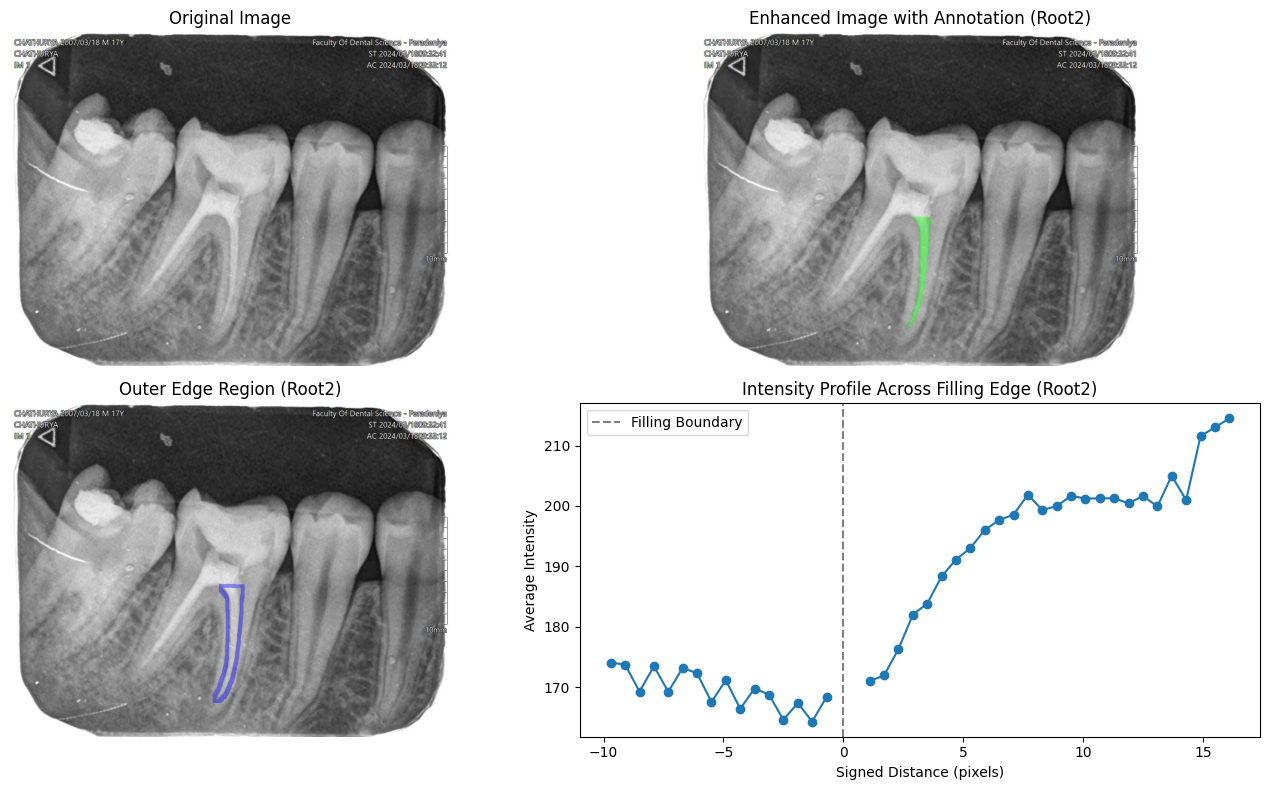

Intensity profile for Root2 (sampled from -10 to 20 pixels):
Distance  -9.70 px: Intensity 174.04
Distance  -9.10 px: Intensity 173.72
Distance  -8.50 px: Intensity 169.23
Distance  -7.90 px: Intensity 173.44
Distance  -7.30 px: Intensity 169.22
Distance  -6.70 px: Intensity 173.17
Distance  -6.10 px: Intensity 172.28
Distance  -5.50 px: Intensity 167.53
Distance  -4.90 px: Intensity 171.13
Distance  -4.30 px: Intensity 166.41
Distance  -3.70 px: Intensity 169.76
Distance  -3.10 px: Intensity 168.76
Distance  -2.50 px: Intensity 164.57
Distance  -1.90 px: Intensity 167.35
Distance  -1.30 px: Intensity 164.28
Distance  -0.70 px: Intensity 168.34
Distance  -0.10 px: Intensity    nan
Distance   0.50 px: Intensity    nan
Distance   1.10 px: Intensity 171.00
Distance   1.70 px: Intensity 171.92
Distance   2.30 px: Intensity 176.28
Distance   2.90 px: Intensity 181.99
Distance   3.50 px: Intensity 183.81
Distance   4.10 px: Intensity 188.32
Distance   4.70 px: Intensity 191.11
Distance   5.3

In [44]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    (Assumes normalized points are in percentage; adjust if needed.)
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def overlay_annotation(image, points, color=(0, 255, 0), alpha=0.4):
    """
    Overlay a filled polygon with a semi-transparent color on the image.
    """
    overlay = image.copy()
    pts = np.array(points, dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def overlay_mask(image, mask, color, alpha=0.4):
    """
    Overlay a transparent colored mask (from a binary mask) on the image.
    """
    overlay = image.copy()
    overlay[mask == 255] = color
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def get_outer_edge(mask, iterations=10):
    """
    Compute the outer edge region by dilating the mask and subtracting the original.
    The 'iterations' parameter can be tuned to approximate a 2mm region (in pixels).
    """
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(mask, kernel, iterations=iterations)
    outer_edge = cv2.subtract(dilated, mask)
    return outer_edge

def compute_signed_distance(mask):
    """
    Compute a signed distance map from the polygon mask.
    Pixels inside the mask get positive distances,
    and pixels outside get negative distances.
    """
    mask_bool = (mask > 0).astype(np.uint8)
    dist_inside = cv2.distanceTransform(mask, cv2.DIST_L2, 5)
    dist_outside = cv2.distanceTransform(255 - mask, cv2.DIST_L2, 5)
    
    signed_distance = np.zeros_like(mask, dtype=np.float32)
    signed_distance[mask_bool == 1] = dist_inside[mask_bool == 1]
    signed_distance[mask_bool == 0] = -dist_outside[mask_bool == 0]
    return signed_distance

def sample_intensity_profile(gray, signed_distance, min_dist, max_dist, num_bins=50):
    """
    Compute the average intensity for pixels binned by their signed distance
    from the polygon boundary. This yields an intensity profile across the edge.
    """
    bins = np.linspace(min_dist, max_dist, num_bins+1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_intensity = np.zeros(num_bins)
    
    for i in range(num_bins):
        mask_bin = (signed_distance >= bins[i]) & (signed_distance < bins[i+1])
        if np.sum(mask_bin) > 0:
            bin_intensity[i] = np.mean(gray[mask_bin])
        else:
            bin_intensity[i] = np.nan
    return bin_centers, bin_intensity

def main():
    # File and parameter settings
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    sample_range_pixels = 20  # Range in pixels for intensity sampling (adjust as needed)
    num_bins = 50             # Number of bins for intensity profile sampling
    outer_edge_iterations = 10  # Dilation iterations to approximate ~2mm outer edge
    
    # Load annotations and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Plot the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Enhance image using CLAHE and convert to grayscale
    enhanced_image = apply_clahe_color(image)
    enhanced_image = image
    gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)
    
    # Process each annotation (each root filling)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]
            
            # Get original dimensions for scaling
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create a mask for the filling region
            mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Overlay the filled annotation (transparent green) on the enhanced image
            annotated_img = overlay_annotation(enhanced_image, scaled_points, color=(0, 255, 0), alpha=0.4)
            
            # Compute the outer edge mask
            outer_edge = get_outer_edge(mask, iterations=outer_edge_iterations)
            # Overlay the outer edge (transparent red) on the enhanced image
            outer_edge_overlay = overlay_mask(enhanced_image, outer_edge, color=(255, 0, 0), alpha=0.4)
            
            # Compute the signed distance map from the filling mask
            signed_distance = compute_signed_distance(mask)
            # Define sampling range from -sample_range_pixels to +sample_range_pixels
            min_dist = -10
            max_dist = sample_range_pixels
            bin_centers, bin_intensity = sample_intensity_profile(gray, signed_distance, min_dist, max_dist, num_bins)
            
            # Plot the enhanced image with annotation, the outer edge overlay, and the intensity profile
            plt.figure(figsize=(14, 8))
            
            plt.subplot(2, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis("off")
            
            plt.subplot(2, 2, 2)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Enhanced Image with Annotation ({label})")
            plt.axis("off")
            
            plt.subplot(2, 2, 3)
            plt.imshow(cv2.cvtColor(outer_edge_overlay, cv2.COLOR_BGR2RGB))
            plt.title(f"Outer Edge Region ({label})")
            plt.axis("off")
            
            plt.subplot(2, 2, 4)
            plt.plot(bin_centers, bin_intensity, marker='o')
            plt.xlabel("Signed Distance (pixels)")
            plt.ylabel("Average Intensity")
            plt.title(f"Intensity Profile Across Filling Edge ({label})")
            plt.axvline(0, color='gray', linestyle='--', label='Filling Boundary')
            # plt.xlim(-10, 13)
            plt.legend()
            
            plt.tight_layout()
            plt.show()
            
            # Optionally, print the intensity profile values in the console
            print(f"Intensity profile for {label} (sampled from {min_dist} to {max_dist} pixels):")
            for center, intensity in zip(bin_centers, bin_intensity):
                print(f"Distance {center:6.2f} px: Intensity {intensity:6.2f}")
            print("-" * 50)

if __name__ == "__main__":
    main()


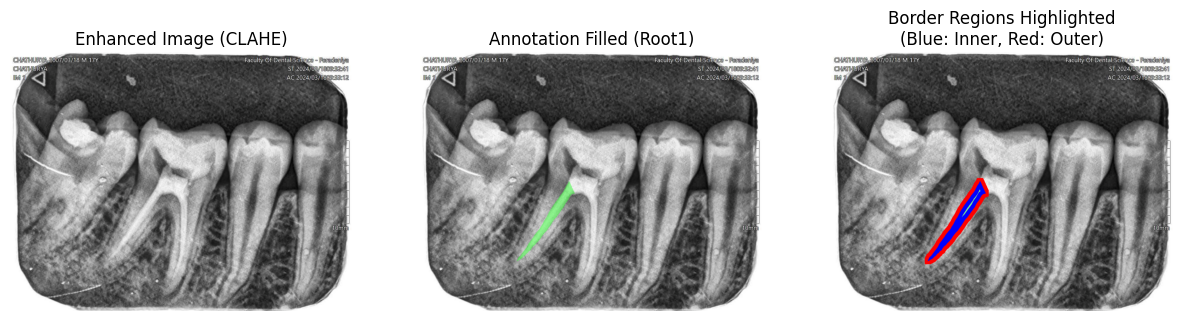

Results for Root1:
  Average intensity in filling region: 211.39
  Average intensity in inner border (edge inside): 210.58
  Average intensity in outer border (edge outside): 167.45
--------------------------------------------------


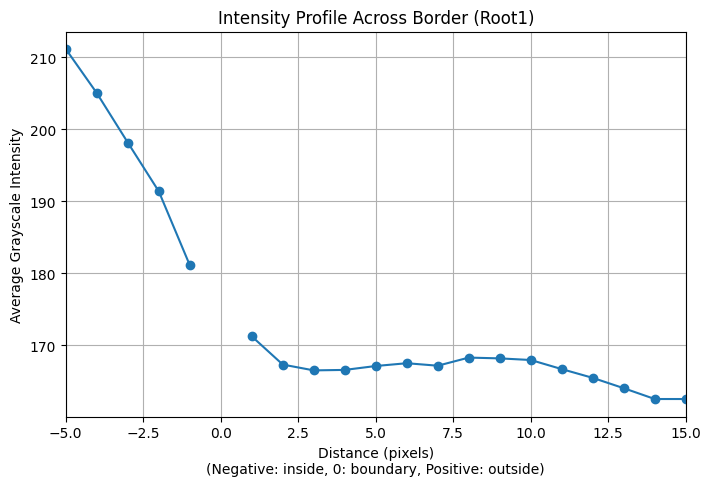

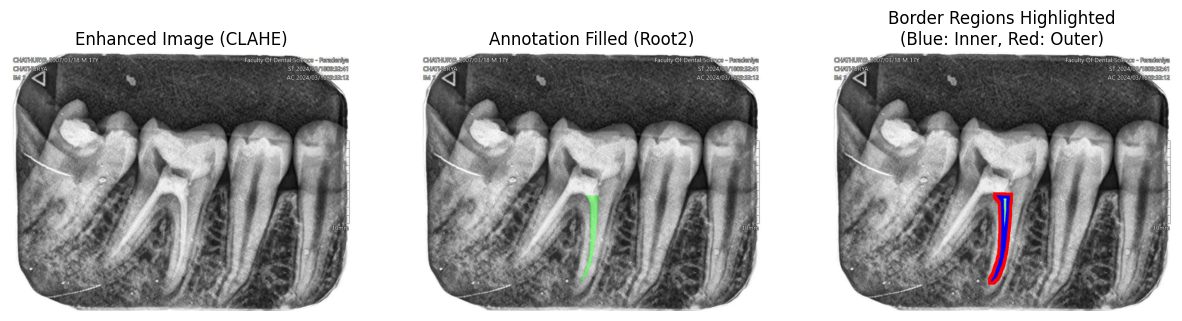

Results for Root2:
  Average intensity in filling region: 208.04
  Average intensity in inner border (edge inside): 207.39
  Average intensity in outer border (edge outside): 178.70
--------------------------------------------------


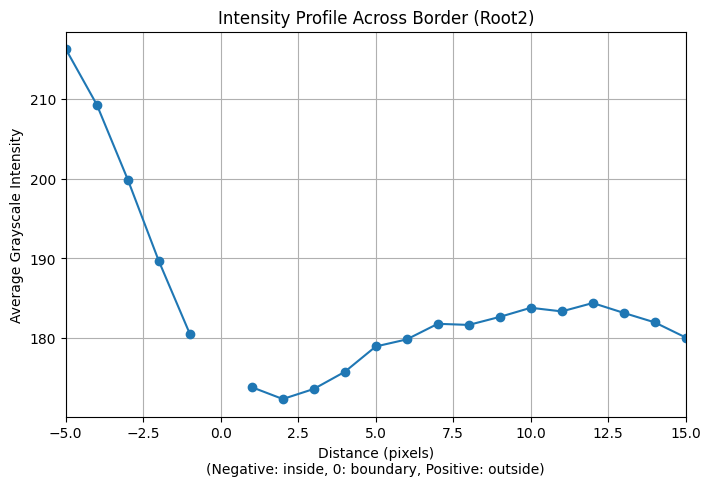

In [46]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance the image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    Assumes the normalized points are given in percentages.
    Adjust the conversion if your points are normalized differently.
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    The mask will have the same height and width as the input image.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def create_border_regions(mask, range_pixels):
    """
    Given a binary mask, create inner and outer border regions using
    morphological erosion and dilation.
    
    - inner_border: region lost when eroding the mask by 'range_pixels'
    - outer_border: additional region gained when dilating the mask by 'range_pixels'
    
    Note: 'range_pixels' is an approximation for 2mm in pixels. Adjust as needed.
    """
    kernel = np.ones((3,3), np.uint8)
    eroded = cv2.erode(mask, kernel, iterations=range_pixels)
    dilated = cv2.dilate(mask, kernel, iterations=range_pixels)
    
    inner_border = cv2.subtract(mask, eroded)
    outer_border = cv2.subtract(dilated, mask)
    return inner_border, outer_border

def analyze_intensities(image, mask, inner_border, outer_border):
    """
    Analyze average grayscale intensities in:
      - The filling region (mask)
      - The inner border (edge within the filling)
      - The outer border (just outside the filling)
      
    The analysis is done on a grayscale version of the image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    filling_values = gray[mask == 255]
    inner_values = gray[inner_border == 255]
    outer_values = gray[outer_border == 255]
    
    avg_filling = np.mean(filling_values) if filling_values.size > 0 else 0
    avg_inner = np.mean(inner_values) if inner_values.size > 0 else 0
    avg_outer = np.mean(outer_values) if outer_values.size > 0 else 0
    
    return avg_filling, avg_inner, avg_outer

def overlay_annotation(image, points, color=(0, 255, 0), alpha=0.4):
    """
    Overlay a filled polygon with transparency on the image.
    """
    overlay = image.copy()
    pts = np.array(points, dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def compute_intensity_profile(image, mask, inner_pixels=5, outer_pixels=15):
    """
    Compute the average grayscale intensity in 1-pixel-wide bins
    from inner_pixels inside (negative values) to outer_pixels outside (positive values)
    the boundary of the filled region.
    
    The method computes a signed distance transform where pixels inside the mask
    have negative distances and outside have positive distances.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure mask is binary (0 or 255) and uint8 type
    mask_uint8 = (mask > 0).astype(np.uint8) * 255
    
    # Compute distance transforms
    inside_dt = cv2.distanceTransform(mask_uint8, cv2.DIST_L2, 5)
    mask_inv = cv2.bitwise_not(mask_uint8)
    outside_dt = cv2.distanceTransform(mask_inv, cv2.DIST_L2, 5)
    
    # Create signed distance map: negative inside, positive outside
    sdt = np.zeros_like(mask, dtype=np.float32)
    sdt[mask_uint8 > 0] = -inside_dt[mask_uint8 > 0]
    sdt[mask_uint8 == 0] = outside_dt[mask_uint8 == 0]
    
    # Define bin centers from -inner_pixels to outer_pixels (e.g., -5 to 15)
    bins = np.arange(-inner_pixels, outer_pixels + 1, 1)
    intensity_profile = []
    
    # For each bin, consider pixels with signed distance in [b - 0.5, b + 0.5)
    for b in bins:
        lower = b - 0.5
        upper = b + 0.5
        bin_mask = (sdt >= lower) & (sdt < upper)
        if np.any(bin_mask):
            mean_val = np.mean(gray[bin_mask])
        else:
            mean_val = np.nan  # In case no pixel falls into this bin
        intensity_profile.append(mean_val)
    
    return bins, intensity_profile

def main():
    # Define file names and parameters
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    range_pixels = 10  # Approximate pixel distance for a 2mm range (adjust as needed)
    
    # Load annotation JSON and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"  # e.g., "/data/upload/1/e08721c8-3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Enhance the image using CLAHE
    enhanced_image = apply_clahe_color(image)
    
    results = []
    
    # Process each annotation (each root filling polygon)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]  # e.g., "Root1" or "Root2"
            
            # Get original dimensions for scaling (fallback to image dimensions if missing)
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create the filled region mask from the scaled points
            mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Create border regions (inner and outer) from the mask
            inner_border, outer_border = create_border_regions(mask, range_pixels)
            
            # Analyze the average intensities in the filling region and border regions
            avg_filling, avg_inner, avg_outer = analyze_intensities(enhanced_image, mask, inner_border, outer_border)
            
            results.append({
                'label': label,
                'avg_filling': avg_filling,
                'avg_inner': avg_inner,
                'avg_outer': avg_outer,
                'mask': mask,
                'inner_border': inner_border,
                'outer_border': outer_border,
                'scaled_points': scaled_points
            })
            
            # Overlay the filled annotation region (with transparency) on the enhanced image
            annotated_img = overlay_annotation(enhanced_image, scaled_points, color=(0, 255, 0), alpha=0.4)
            
            # For visualization, we will also highlight the inner and outer border regions in different colors
            border_overlay = annotated_img.copy()
            # Color inner border in blue
            border_overlay[inner_border == 255] = [255, 0, 0]
            # Color outer border in red
            border_overlay[outer_border == 255] = [0, 0, 255]
            
            # Display the images
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
            plt.title("Enhanced Image (CLAHE)")
            plt.axis("off")
            
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Annotation Filled ({label})")
            plt.axis("off")
            
            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(border_overlay, cv2.COLOR_BGR2RGB))
            plt.title("Border Regions Highlighted\n(Blue: Inner, Red: Outer)")
            plt.axis("off")
            plt.show()
            
            print(f"Results for {label}:")
            print(f"  Average intensity in filling region: {avg_filling:.2f}")
            print(f"  Average intensity in inner border (edge inside): {avg_inner:.2f}")
            print(f"  Average intensity in outer border (edge outside): {avg_outer:.2f}")
            print("-" * 50)
            
            # Compute intensity profile from 5 pixels inside (-5) to 15 pixels outside (+15)
            bins, intensity_profile = compute_intensity_profile(enhanced_image, mask, inner_pixels=5, outer_pixels=15)
            
            # Plot the intensity profile
            plt.figure(figsize=(8, 5))
            plt.plot(bins, intensity_profile, marker='o', linestyle='-')
            plt.xlabel('Distance (pixels)\n(Negative: inside, 0: boundary, Positive: outside)')
            plt.ylabel('Average Grayscale Intensity')
            plt.title(f'Intensity Profile Across Border ({label})')
            plt.grid(True)
            plt.xlim([-5, 15])
            plt.show()

if __name__ == "__main__":
    main()


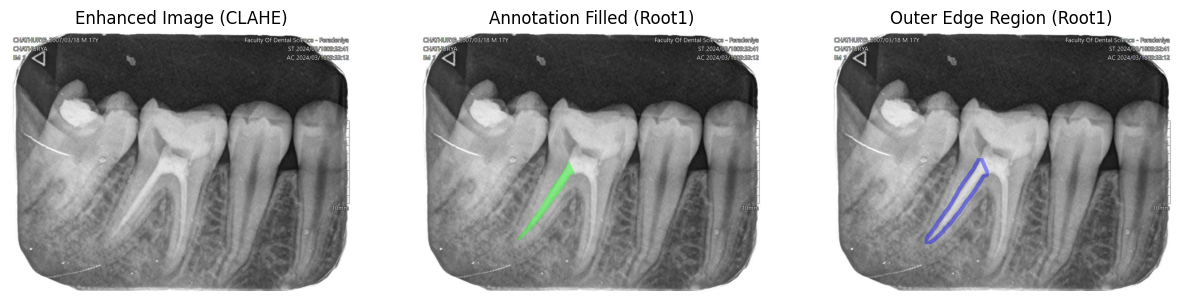

Results for Root1:
  Average intensity in filling region: 200.30
  Average intensity in inner border (edge inside): 199.40
  Average intensity in outer border (edge outside): 171.85
--------------------------------------------------


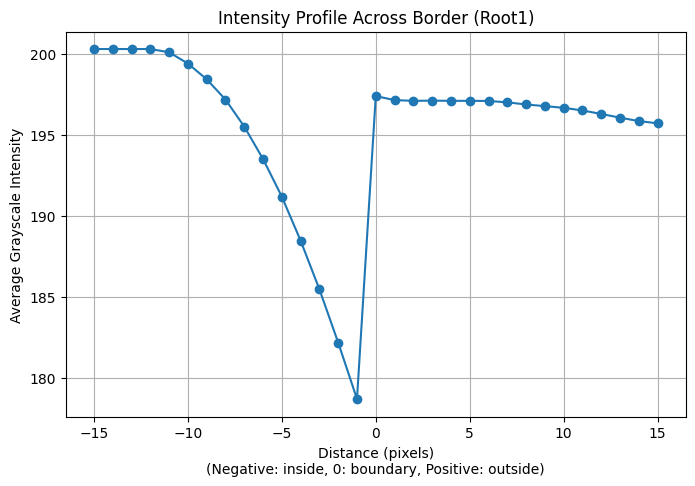

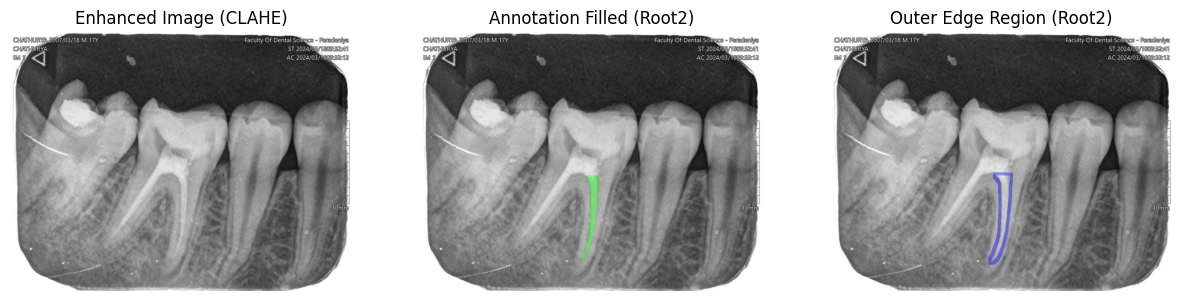

Results for Root2:
  Average intensity in filling region: 189.53
  Average intensity in inner border (edge inside): 188.35
  Average intensity in outer border (edge outside): 170.29
--------------------------------------------------


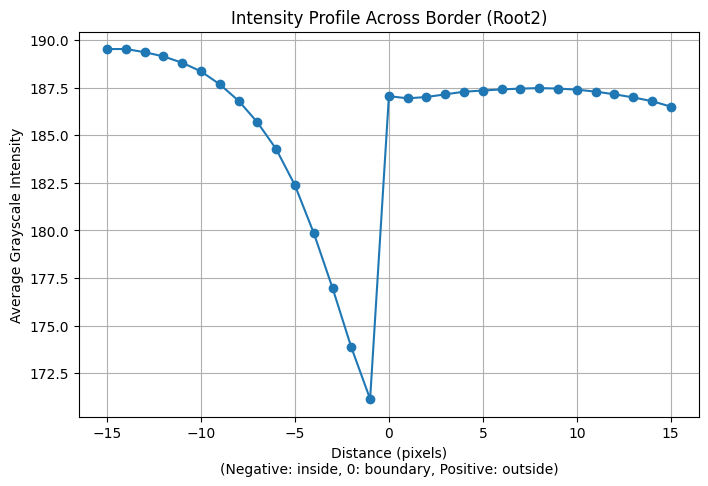

In [52]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=2.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance the image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    Assumes the normalized points are given in percentages.
    Adjust the conversion if your points are normalized differently.
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    The mask will have the same height and width as the input image.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def create_border_regions(mask, range_pixels):
    """
    Given a binary mask, create inner and outer border regions using
    morphological erosion and dilation.
    
    - inner_border: region lost when eroding the mask by 'range_pixels'
    - outer_border: additional region gained when dilating the mask by 'range_pixels'
    
    Note: 'range_pixels' is an approximation for 2mm in pixels. Adjust as needed.
    """
    kernel = np.ones((3,3), np.uint8)
    eroded = cv2.erode(mask, kernel, iterations=range_pixels)
    dilated = cv2.dilate(mask, kernel, iterations=range_pixels)
    
    inner_border = cv2.subtract(mask, eroded)
    outer_border = cv2.subtract(dilated, mask)
    return inner_border, outer_border

def analyze_intensities(image, mask, inner_border, outer_border):
    """
    Analyze average grayscale intensities in:
      - The filling region (mask)
      - The inner border (edge within the filling)
      - The outer border (just outside the filling)
      
    The analysis is done on a grayscale version of the image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    filling_values = gray[mask == 255]
    inner_values = gray[inner_border == 255]
    outer_values = gray[outer_border == 255]
    
    avg_filling = np.mean(filling_values) if filling_values.size > 0 else 0
    avg_inner = np.mean(inner_values) if inner_values.size > 0 else 0
    avg_outer = np.mean(outer_values) if outer_values.size > 0 else 0
    
    return avg_filling, avg_inner, avg_outer

def overlay_annotation(image, points, color=(0, 255, 0), alpha=0.4):
    """
    Overlay a filled polygon with transparency on the image.
    """
    overlay = image.copy()
    pts = np.array(points, dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def compute_intensity_profile(image, mask, inner_pixels=15, outer_pixels=15):
    """
    Compute the average grayscale intensity in 1-pixel-wide bins
    from inner_pixels inside (negative values) to outer_pixels outside (positive values)
    the boundary of the filled region.
    """

    bins = np.arange(-inner_pixels, outer_pixels + 1, 1)
    intensity_profile = []

    kernel = np.ones((3,3), np.uint8)

    for b in bins:
        if b < 0:
            eroded_1 = cv2.erode(mask, kernel, iterations=abs(b))
            border_1 = cv2.subtract(mask, eroded_1)

            eroded_2 = cv2.erode(mask, kernel, iterations=abs(b) + 1)
            border = cv2.subtract(border_1, eroded_2)
        else:
            dilated_1 = cv2.dilate(mask, kernel, iterations=b)
            border_1 = cv2.subtract(dilated_1, mask)

            dilated_2 = cv2.dilate(mask, kernel, iterations=b + 1)
            border = cv2.subtract(dilated_2, border_1)
        values = image[border == 255]
        intensity_profile.append(np.mean(values) if values.size > 0 else 0)
    return bins, intensity_profile


def main():
    # Define file names and parameters
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    range_pixels = 10  # Approximate pixel distance for a 2mm range (adjust as needed)
    
    # Load annotation JSON and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"  # e.g., "/data/upload/1/e08721c8-3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Enhance the image using CLAHE
    enhanced_image = apply_clahe_color(image)
    enhanced_image = image
    
    results = []
    
    # Process each annotation (each root filling polygon)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]  # e.g., "Root1" or "Root2"
            
            # Get original dimensions for scaling (fallback to image dimensions if missing)
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create the filled region mask from the scaled points
            mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Create border regions (inner and outer) from the mask
            inner_border, outer_border = create_border_regions(mask, range_pixels)
            
            # Analyze the average intensities in the filling region and border regions
            avg_filling, avg_inner, avg_outer = analyze_intensities(enhanced_image, mask, inner_border, outer_border)
            
            results.append({
                'label': label,
                'avg_filling': avg_filling,
                'avg_inner': avg_inner,
                'avg_outer': avg_outer,
                'mask': mask,
                'inner_border': inner_border,
                'outer_border': outer_border,
                'scaled_points': scaled_points
            })
            
            # Overlay the filled annotation region (with transparency) on the enhanced image
            annotated_img = overlay_annotation(enhanced_image, scaled_points, color=(0, 255, 0), alpha=0.4)
            
            # For visualization, we will also highlight the inner and outer border regions in different colors
            outer_edge_overlay = overlay_mask(enhanced_image, outer_border, color=(255, 0, 0), alpha=0.4)
            
            # Display the images
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
            plt.title("Enhanced Image (CLAHE)")
            plt.axis("off")
            
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Annotation Filled ({label})")
            plt.axis("off")
            
            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(outer_edge_overlay, cv2.COLOR_BGR2RGB))
            plt.title(f"Outer Edge Region ({label})")
            plt.axis("off")
            plt.show()
            
            print(f"Results for {label}:")
            print(f"  Average intensity in filling region: {avg_filling:.2f}")
            print(f"  Average intensity in inner border (edge inside): {avg_inner:.2f}")
            print(f"  Average intensity in outer border (edge outside): {avg_outer:.2f}")
            print("-" * 50)
            
            # Compute intensity profile from 5 pixels inside (-5) to 15 pixels outside (+15)
            bins, intensity_profile = compute_intensity_profile(enhanced_image, mask, inner_pixels=15, outer_pixels=15)
            
            # Plot the intensity profile
            plt.figure(figsize=(8, 5))
            plt.plot(bins, intensity_profile, marker='o', linestyle='-')
            plt.xlabel('Distance (pixels)\n(Negative: inside, 0: boundary, Positive: outside)')
            plt.ylabel('Average Grayscale Intensity')
            plt.title(f'Intensity Profile Across Border ({label})')
            plt.grid(True)
            plt.show()

if __name__ == "__main__":
    main()


Results for Root1:
  Average intensity in filling region: 200.30
  Average intensity in inner border (edge inside): 199.40
  Average intensity in outer border (edge outside): 171.85
--------------------------------------------------
Percentage of low-intensity pixels in composite border: 0.00%
Percentage of low-intensity pixels in outer region of Root1: 0.00%


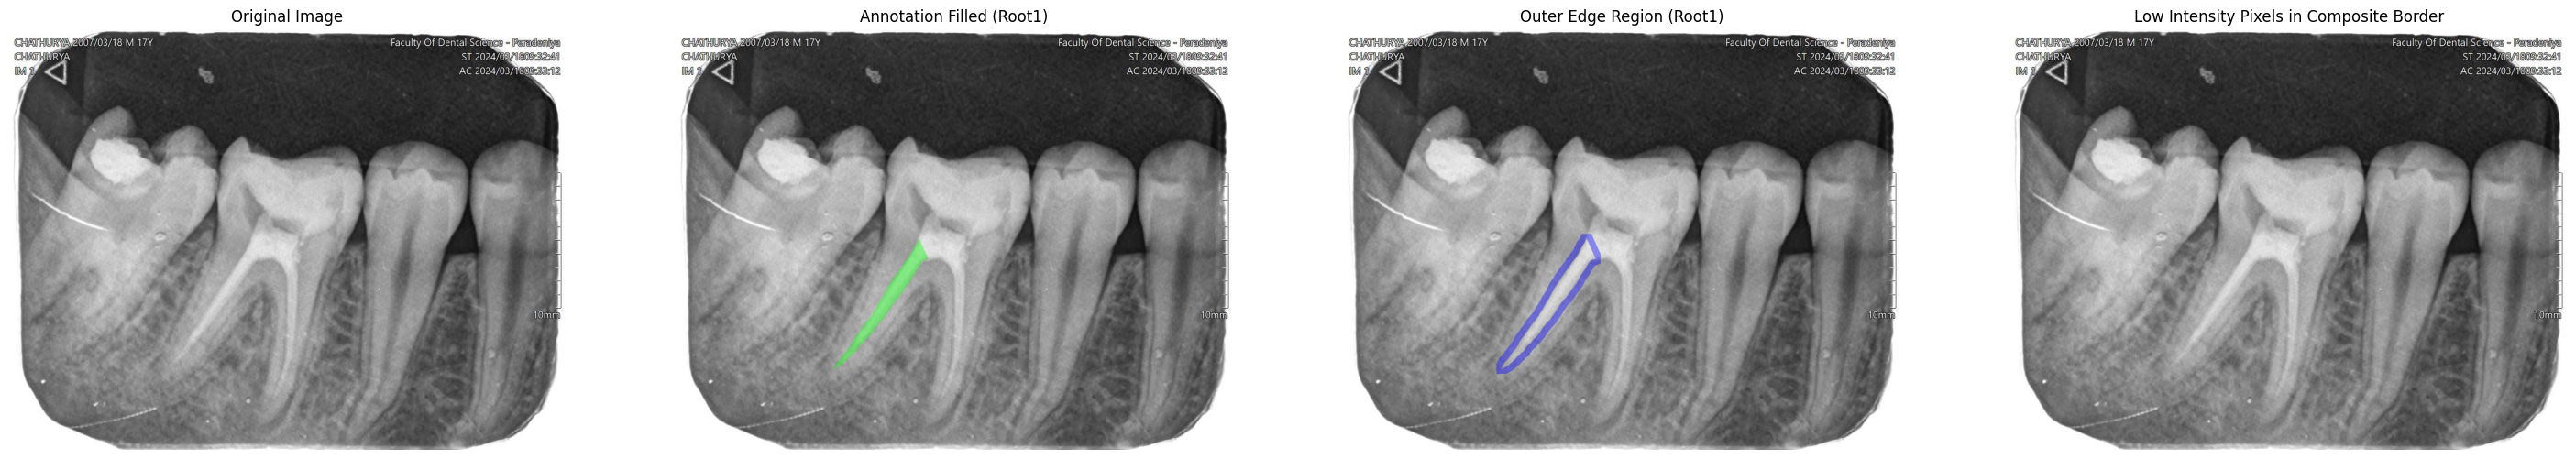

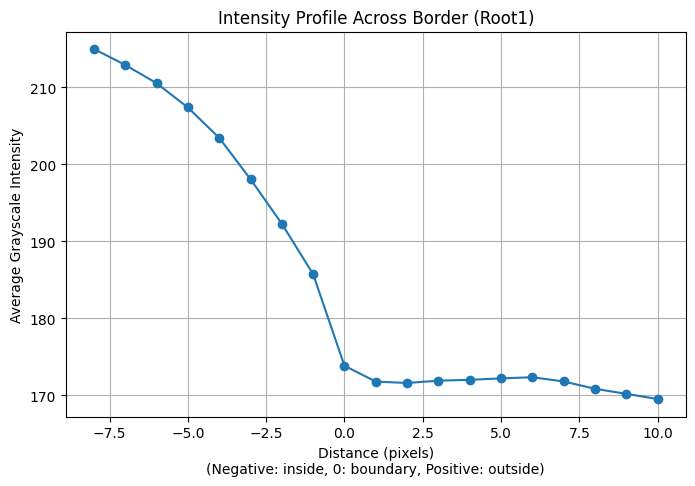

Results for Root2:
  Average intensity in filling region: 189.53
  Average intensity in inner border (edge inside): 188.35
  Average intensity in outer border (edge outside): 170.29
--------------------------------------------------
Percentage of low-intensity pixels in composite border: 63.56%
Percentage of low-intensity pixels in outer region of Root2: 19.79%


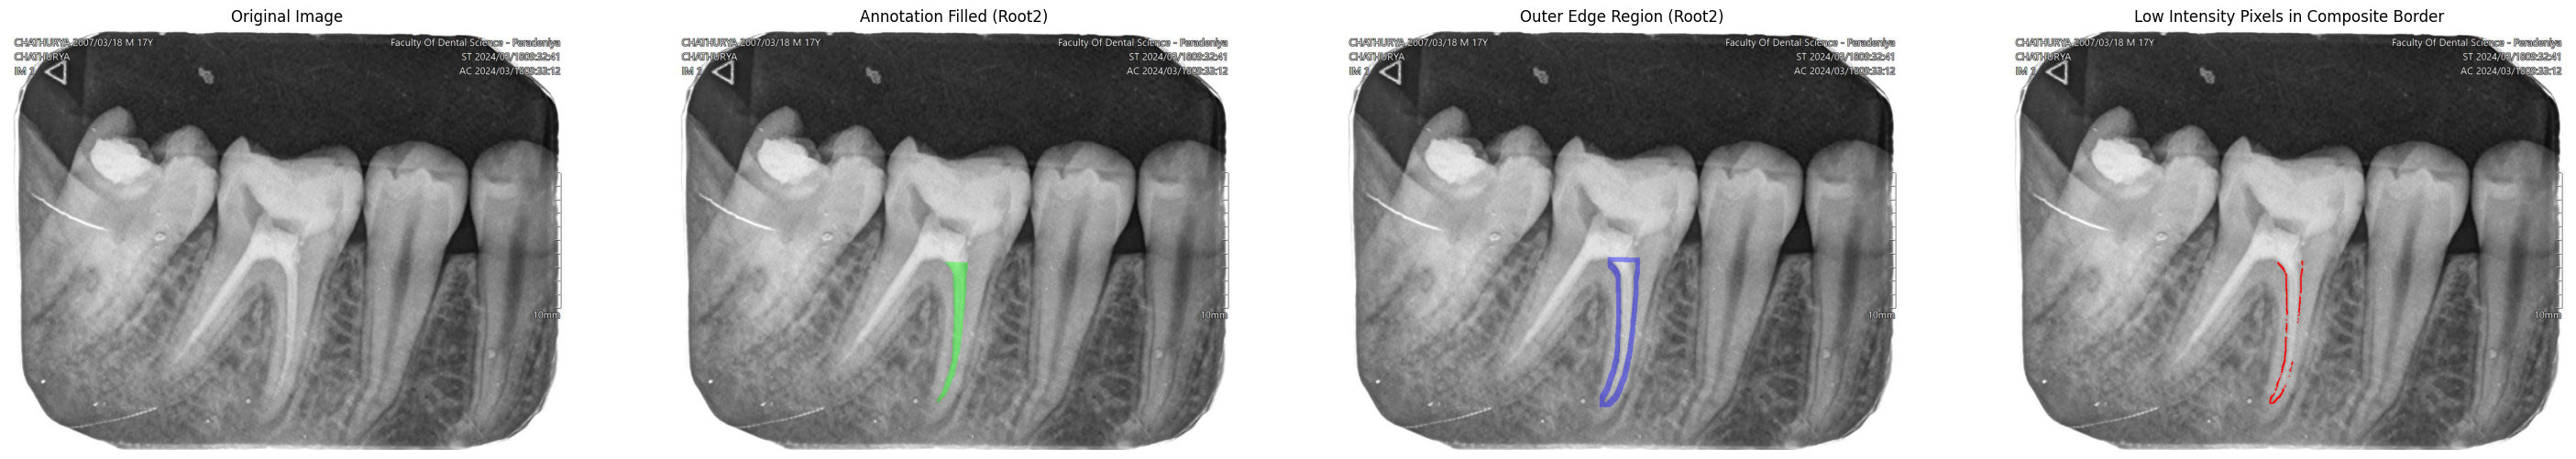

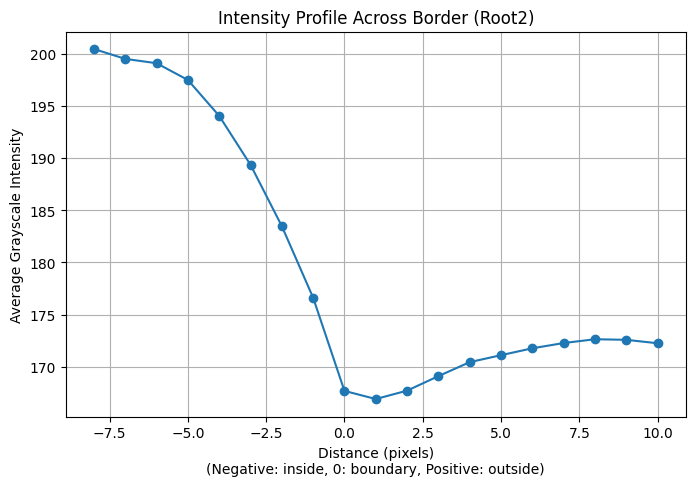

In [95]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(json_file):
    """Load the annotation JSON file."""
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

def load_image(image_path):
    """Load an image from the given path."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print("Error loading image:", image_path)
    return img

def apply_clahe_color(image, clip_limit=1.0, tile_grid_size=(8,8)):
    """
    Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    on the L-channel of the LAB representation to enhance the image details.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced

def scale_points(points, orig_width, orig_height):
    """
    Convert normalized polygon points to pixel coordinates.
    Assumes the normalized points are given in percentages.
    Adjust the conversion if your points are normalized differently.
    """
    scaled = []
    for pt in points:
        x = int(pt[0] / 100.0 * orig_width)
        y = int(pt[1] / 100.0 * orig_height)
        scaled.append([x, y])
    return scaled

def create_mask_for_polygon(img_shape, points):
    """
    Create a binary mask from a list of polygon points.
    The mask will have the same height and width as the input image.
    """
    pts = np.array(points, dtype=np.int32)
    mask = np.zeros(img_shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [pts], 255)
    return mask

def create_border_regions(mask, range_pixels):
    """
    Given a binary mask, create inner and outer border regions using
    morphological erosion and dilation.
    
    - inner_border: region lost when eroding the mask by 'range_pixels'
    - outer_border: additional region gained when dilating the mask by 'range_pixels'
    
    Note: 'range_pixels' is an approximation for 2mm in pixels. Adjust as needed.
    """
    kernel = np.ones((3,3), np.uint8)
    eroded = cv2.erode(mask, kernel, iterations=range_pixels)
    dilated = cv2.dilate(mask, kernel, iterations=range_pixels)
    
    inner_border = cv2.subtract(mask, eroded)
    outer_border = cv2.subtract(dilated, mask)
    return inner_border, outer_border

def analyze_intensities(image, mask, inner_border, outer_border):
    """
    Analyze average grayscale intensities in:
      - The filling region (mask)
      - The inner border (edge within the filling)
      - The outer border (just outside the filling)
      
    The analysis is done on a grayscale version of the image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    filling_values = gray[mask == 255]
    inner_values = gray[inner_border == 255]
    outer_values = gray[outer_border == 255]
    
    avg_filling = np.mean(filling_values) if filling_values.size > 0 else 0
    avg_inner = np.mean(inner_values) if inner_values.size > 0 else 0
    avg_outer = np.mean(outer_values) if outer_values.size > 0 else 0
    
    return avg_filling, avg_inner, avg_outer

def overlay_annotation(image, points, color=(0, 255, 0), alpha=0.4):
    """
    Overlay a filled polygon with transparency on the image.
    """
    overlay = image.copy()
    pts = np.array(points, dtype=np.int32)
    cv2.fillPoly(overlay, [pts], color)
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def overlay_mask(image, mask, color=(255, 0, 0), alpha=0.4):
    """
    Overlay a binary mask on the image with a specified color and transparency.
    """
    overlay = image.copy()
    overlay[mask == 255] = color
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def mark_low_intensity_pixels(image, outer_mask, threshold=200, mark_color=(0, 0, 255), alpha=0.5):
    """
    Mark pixels in the outer edge region (outer_mask) where the grayscale intensity
    is less than the specified threshold.
    
    The pixels are marked with the provided mark_color.
    
    Returns:
        - The image with marked low-intensity pixels
        - The count of low-intensity pixels
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Create a boolean mask for pixels in outer_mask with intensity less than threshold
    low_intensity_mask = (outer_mask == 255) & (gray < threshold)
    
    # Count the number of low-intensity pixels
    low_intensity_pixel_count = np.sum(low_intensity_mask)
    
    marked = image.copy()
    # Mark these pixels with mark_color
    marked[low_intensity_mask] = mark_color
    combined = cv2.addWeighted(marked, alpha, image, 1 - alpha, 0)
    
    return combined, low_intensity_pixel_count

def compute_intensity_profile(image, mask, inner_pixels=8, outer_pixels=10):
    """
    Compute the average grayscale intensity in 1-pixel-wide bins
    from inner_pixels inside (-ve) to outer_pixels outside (+ve).
    
    Returns:
        - bins: List of distances from the boundary
        - intensity_profile: Mean grayscale intensity per bin
        - bin_masks: Dictionary mapping bin indices to pixel masks
    """
    bins = np.arange(-inner_pixels, outer_pixels + 1, 1)
    intensity_profile = []
    bin_masks = {}  # Store masks for each bin
    kernel = np.ones((3,3), np.uint8)

    for b in bins:
        if b < 0:
            eroded_1 = cv2.erode(mask, kernel, iterations=abs(b))
            border_1 = cv2.subtract(mask, eroded_1)

            eroded_2 = cv2.erode(mask, kernel, iterations=abs(b) + 1)
            border_2 = cv2.subtract(mask, eroded_2)

            border = cv2.subtract(border_2, border_1)
        else:
            dilated_1 = cv2.dilate(mask, kernel, iterations=b)
            border_1 = cv2.subtract(dilated_1, mask)

            dilated_2 = cv2.dilate(mask, kernel, iterations=b + 1)
            border_2 = cv2.subtract(dilated_2, mask)

            border = cv2.subtract(border_2, border_1)

        # Use grayscale for intensity measurement
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        values = gray[border == 255]
        
        mean_intensity = np.mean(values) if values.size > 0 else 0
        intensity_profile.append(mean_intensity)
        bin_masks[b] = border  # Store the mask for this bin
    
    return bins, intensity_profile, bin_masks


def main():
    # Define file names and parameters
    json_file = "project-1-at-2025-03-08-09-20-90354fe7.json"
    range_pixels = 10  # Approximate pixel distance for a 2mm range (adjust as needed)
    
    # Load annotation JSON and image
    annotations = load_annotations(json_file)
    annotation_entry = annotations[0]
    image_path = "3245-chathurya.jpg"  # e.g., "/data/upload/1/e08721c8-3245-chathurya.jpg"
    image = load_image(image_path)
    if image is None:
        return

    # Enhance the image using CLAHE
    enhanced_image = apply_clahe_color(image)
    enhanced_image = image
    
    results = []
    
    # Process each annotation (each root filling polygon)
    for ann in annotation_entry['annotations']:
        for res in ann['result']:
            points = res['value']['points']
            label = res['value']['polygonlabels'][0]  # e.g., "Root1" or "Root2"
            
            # Get original dimensions for scaling (fallback to image dimensions if missing)
            orig_width = res.get("original_width", image.shape[1])
            orig_height = res.get("original_height", image.shape[0])
            
            # Scale the normalized points to pixel coordinates
            scaled_points = scale_points(points, orig_width, orig_height)
            
            # Create the filled region mask from the scaled points
            mask = create_mask_for_polygon(image.shape, scaled_points)
            
            # Create border regions (inner and outer) from the mask
            inner_border, outer_border = create_border_regions(mask, range_pixels)
            
            # Analyze the average intensities in the filling region and border regions
            avg_filling, avg_inner, avg_outer = analyze_intensities(enhanced_image, mask, inner_border, outer_border)
            
            results.append({
                'label': label,
                'avg_filling': avg_filling,
                'avg_inner': avg_inner,
                'avg_outer': avg_outer,
                'mask': mask,
                'inner_border': inner_border,
                'outer_border': outer_border,
                'scaled_points': scaled_points
            })
            
            # Overlay the filled annotation region (with transparency) on the enhanced image
            annotated_img = overlay_annotation(enhanced_image, scaled_points, color=(0, 255, 0), alpha=0.4)
            
            # Highlight the outer edge region in red using overlay_mask
            outer_edge_overlay = overlay_mask(enhanced_image, outer_border, color=(255, 0, 0), alpha=0.4)
            
            # Get count of low-intensity pixels
            low_intensity_marked, low_intensity_pixel_count = mark_low_intensity_pixels(
                enhanced_image, outer_border, threshold=160, mark_color=(0, 0, 255), alpha=0.6
            )

            # Count pixels in the filled annotation region
            filled_pixel_count = np.sum(mask == 255)


            # Display the images
            plt.figure(figsize=(36, 10))
            plt.subplot(1, 4, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis("off")
            
            plt.subplot(1, 4, 2)
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Annotation Filled ({label})")
            plt.axis("off")
            
            plt.subplot(1, 4, 3)
            plt.imshow(cv2.cvtColor(outer_edge_overlay, cv2.COLOR_BGR2RGB))
            plt.title(f"Outer Edge Region ({label})")
            plt.axis("off")
            
            # plt.subplot(1, 4, 4)
            # plt.imshow(cv2.cvtColor(low_intensity_marked, cv2.COLOR_BGR2RGB))
            # plt.title("Low Intensity Marked\n(Outer Edge)")
            # plt.axis("off")
            # plt.show()
            
            print(f"Results for {label}:")
            print(f"  Average intensity in filling region: {avg_filling:.2f}")
            print(f"  Average intensity in inner border (edge inside): {avg_inner:.2f}")
            print(f"  Average intensity in outer border (edge outside): {avg_outer:.2f}")
            print("-" * 50)
            
            # Compute intensity profile
            bins, intensity_profile, bin_masks = compute_intensity_profile(enhanced_image, mask, inner_pixels=8, outer_pixels=10)

            # Step 1: Compute the mean intensity for bins 5 to 10
            ref_bins = np.arange(5, 11)  # Bins from 5 to 10
            ref_intensities = [intensity_profile[bins.tolist().index(b)] for b in ref_bins]
            mean_ref_intensity = np.mean(ref_intensities)

            # Step 2: Identify bins where intensity is lower than mean_ref_intensity
            composite_mask = np.zeros_like(mask)  # Initialize empty mask
            for i, intensity in enumerate(intensity_profile):
                bin_idx = bins[i]
                if intensity < mean_ref_intensity - 4:  # Threshold for lower intensity
                    composite_mask = cv2.bitwise_or(composite_mask, bin_masks[bin_idx])

            # Step 3: Identify pixels in composite border that have intensity < mean_ref_intensity
            gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)
            low_intensity_mask = (composite_mask == 255) & (gray < mean_ref_intensity-4)


            # Step 4: Count and calculate percentage
            low_intensity_pixel_count = np.sum(low_intensity_mask)
            total_composite_pixels = np.sum(composite_mask == 255)
            low_intensity_percentage = (low_intensity_pixel_count / total_composite_pixels) * 100 if total_composite_pixels > 0 else 0

            print(f"Percentage of low-intensity pixels in composite border: {low_intensity_percentage:.2f}%")

            # Compute the percentage
            total_relevant_pixels = filled_pixel_count + low_intensity_pixel_count
            low_intensity_percentage = (low_intensity_pixel_count / total_relevant_pixels) * 100 if total_relevant_pixels > 0 else 0

            # print(filled_pixel_count, low_intensity_pixel_count, total_relevant_pixels, low_intensity_percentage)

            print(f"Percentage of low-intensity pixels in outer region of {label}: {low_intensity_percentage:.2f}%")

            # Step 5: Visualize the composite mask and low-intensity pixels
            marked = enhanced_image.copy()
            marked[low_intensity_mask] = (0, 0, 255)  # Mark low-intensity pixels in red
            plt.subplot(1, 4, 4)
            plt.imshow(cv2.cvtColor(marked, cv2.COLOR_BGR2RGB))
            plt.title("Low Intensity Pixels in Composite Border")
            plt.axis("off")
            plt.show()
            
            # Plot the intensity profile
            plt.figure(figsize=(8, 5))
            plt.plot(bins, intensity_profile, marker='o', linestyle='-')
            plt.xlabel('Distance (pixels)\n(Negative: inside, 0: boundary, Positive: outside)')
            plt.ylabel('Average Grayscale Intensity')
            plt.title(f'Intensity Profile Across Border ({label})')
            plt.grid(True)
            plt.show()

if __name__ == "__main__":
    main()
